In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Bitcoin Historical Data.csv')

df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=False)

print("\nWith dayfirst=False:")
print(df[['Date', 'Price']].head())



With dayfirst=False:
        Date     Price
0 2025-11-01   86864.1
1 2025-10-01  109602.8
2 2025-09-01  114048.5
3 2025-08-01  108226.8
4 2025-07-01  115765.0
Cleaned price range: $3,437.20 to $115,765.00


In [23]:
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(',', '')
    .str.replace('"', '')  # Remove quotes if present
    .astype(float)
)
print(f"Cleaned price range: ${df['Price'].min():,.2f} to ${df['Price'].max():,.2f}")

Cleaned price range: $3,437.20 to $115,765.00


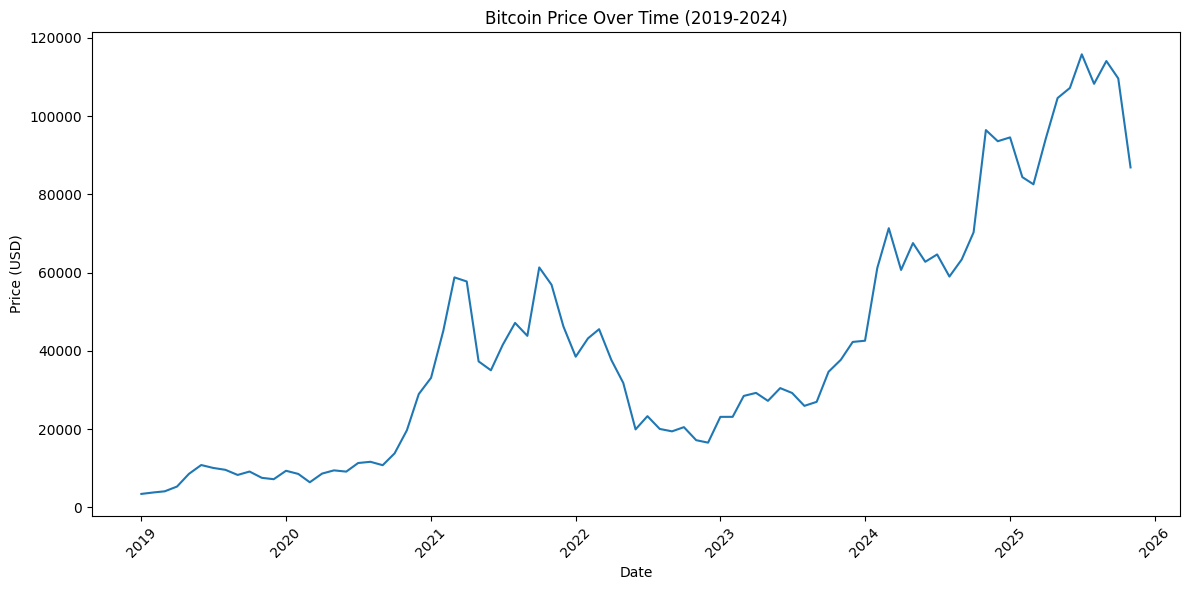

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Price')
plt.title("Bitcoin Price Over Time (2019-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data Overview:
Date range: 2024-01-01 00:00:00 to 2025-11-01 00:00:00
Number of months: 23
Price range: $42,580.50 to $115,765.00
Last price: $87,382.70


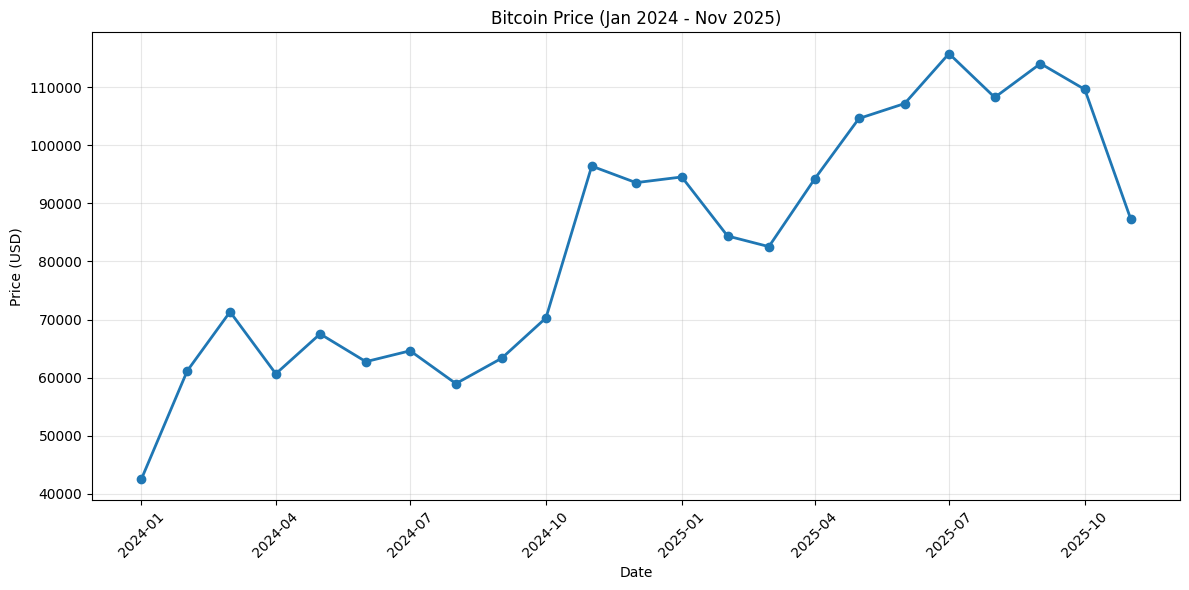

In [24]:

# Load and prepare the data
df = pd.read_csv('Bitcoin Historical Data(1).csv')

# Data cleaning
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort by date to ensure chronological order
df = df.sort_values('Date')

print("Data Overview:")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of months: {len(df)}")
print(f"Price range: ${df['Price'].min():,.2f} to ${df['Price'].max():,.2f}")
print(f"Last price: ${df['Price'].iloc[-1]:,.2f}")

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', linewidth=2)
plt.title("Bitcoin Price (Jan 2024 - Nov 2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




Parameter Estimation (Jan 2024 - Nov 2025):
Monthly log-return (μ): 0.0327
Monthly volatility (σ): 0.1396
Annualized volatility: 48.34%

Monte Carlo Simulation:
Starting price: $87,382.70
Forecast horizon: 12 months
Number of simulations: 50000


C:\Users\HP\AppData\Local\Temp\ipykernel_11556\1487517073.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


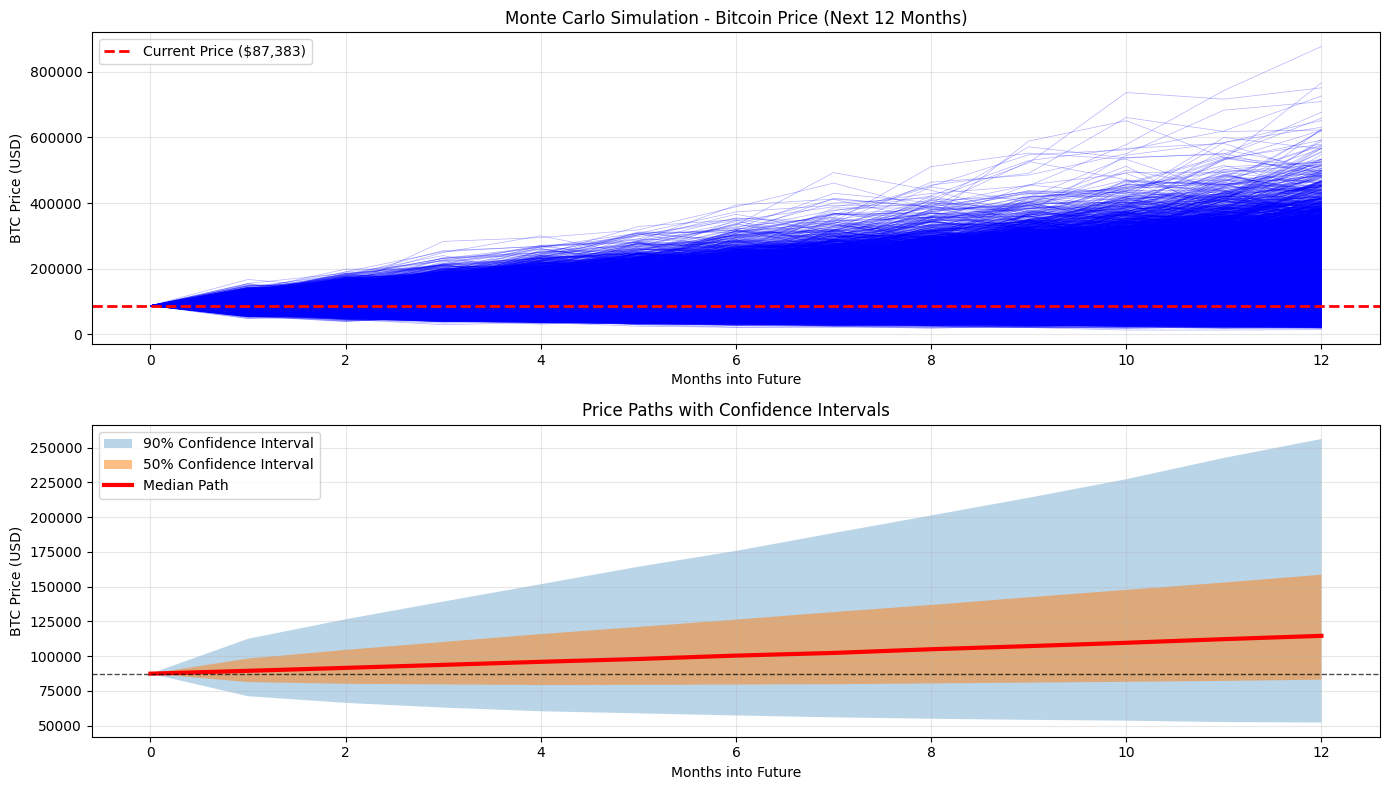


MONTE CARLO SIMULATION RESULTS
Starting Price: $87,382.70

Price Distribution after 12 months:
----------------------------------------
5th percentile:  $52,204.28  (-40.3%)
10th percentile: $61,926.01  (-29.1%)
25th percentile: $83,046.55  (-5.0%)
50th percentile: $114,610.60  (31.2%)
75th percentile: $158,631.15  (81.5%)
90th percentile: $212,621.13  (143.3%)
95th percentile: $256,276.96  (193.3%)

Probability Analysis:
----------------------------------------
Probability price increases: 71.5%
Probability price doubles: 19.0%
Probability price halves: 2.2%

Summary DataFrame:
   last_price  mu_monthly_log_return  sigma_monthly_log_return  \
0     87382.7                   0.03                      0.14   

   final_price_5th_pct  final_price_10th_pct  final_price_25th_pct  \
0             52204.28              61926.01              83046.55   

   final_price_median  final_price_75th_pct  final_price_90th_pct  \
0            114610.6             158631.15             212621.13   



In [28]:
# Compute log returns from the entire dataset (already recent)
df['LogReturn'] = np.log(df['Price'] / df['Price'].shift(1))
returns = df['LogReturn'].dropna()

# Monthly parameters
mu = returns.mean()
sigma = returns.std(ddof=1)

print(f"\nParameter Estimation (Jan 2024 - Nov 2025):")
print(f"Monthly log-return (μ): {mu:.4f}")
print(f"Monthly volatility (σ): {sigma:.4f}")
print(f"Annualized volatility: {sigma * np.sqrt(12):.2%}")

# Monte Carlo simulation
last_price = df['Price'].iloc[-1]
months = 12
num_simulations = 50000

paths = np.zeros((months + 1, num_simulations))
paths[0] = last_price


# Run simulations
np.random.seed(42)  # For reproducible results
for t in range(1, months + 1):
    z = np.random.normal(size=num_simulations)
    paths[t] = paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Calculate percentiles
final_prices = paths[-1]
p5, p10, p25, p50, p75, p90, p95 = np.percentile(final_prices, [5, 10, 25, 50, 75, 90, 95])

print(f"\nMonte Carlo Simulation:")
print(f"Starting price: ${last_price:,.2f}")
print(f"Forecast horizon: {months} months")
print(f"Number of simulations: {num_simulations}")

# Plot the simulated paths
plt.figure(figsize=(14, 8))

# Plot all simulation paths
plt.subplot(2, 1, 1)
plt.plot(paths, linewidth=0.5, alpha=0.3, color='blue')
plt.axhline(y=last_price, color='red', linestyle='--', linewidth=2, label=f'Current Price (${last_price:,.0f})')
plt.xlabel("Months into Future")
plt.ylabel("BTC Price (USD)")
plt.title(f"Monte Carlo Simulation - Bitcoin Price (Next {months} Months)")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot with confidence intervals
plt.subplot(2, 1, 2)
percentiles = np.percentile(paths, [5, 25, 50, 75, 95], axis=1)
plt.fill_between(range(months + 1), percentiles[0], percentiles[4], alpha=0.3, label='90% Confidence Interval')
plt.fill_between(range(months + 1), percentiles[1], percentiles[3], alpha=0.5, label='50% Confidence Interval')
plt.plot(percentiles[2], color='red', linewidth=3, label='Median Path')
plt.axhline(y=last_price, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel("Months into Future")
plt.ylabel("BTC Price (USD)")
plt.title("Price Paths with Confidence Intervals")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comprehensive results
print(f"\n{'='*60}")
print("MONTE CARLO SIMULATION RESULTS")
print(f"{'='*60}")
print(f"Starting Price: ${last_price:,.2f}")
print(f"\nPrice Distribution after {months} months:")
print(f"{'-'*40}")
print(f"5th percentile:  ${p5:,.2f}  ({((p5/last_price)-1):.1%})")
print(f"10th percentile: ${p10:,.2f}  ({((p10/last_price)-1):.1%})")
print(f"25th percentile: ${p25:,.2f}  ({((p25/last_price)-1):.1%})")
print(f"50th percentile: ${p50:,.2f}  ({((p50/last_price)-1):.1%})")
print(f"75th percentile: ${p75:,.2f}  ({((p75/last_price)-1):.1%})")
print(f"90th percentile: ${p90:,.2f}  ({((p90/last_price)-1):.1%})")
print(f"95th percentile: ${p95:,.2f}  ({((p95/last_price)-1):.1%})")

print(f"\nProbability Analysis:")
print(f"{'-'*40}")
prob_above_current = np.mean(final_prices > last_price) * 100
prob_double = np.mean(final_prices > (last_price * 2)) * 100
prob_half = np.mean(final_prices < (last_price * 0.5)) * 100

print(f"Probability price increases: {prob_above_current:.1f}%")
print(f"Probability price doubles: {prob_double:.1f}%")
print(f"Probability price halves: {prob_half:.1f}%")

# Create summary dataframe
summary = {
    'last_price': last_price,
    'mu_monthly_log_return': mu,
    'sigma_monthly_log_return': sigma,
    'final_price_5th_pct': p5,
    'final_price_10th_pct': p10,
    'final_price_25th_pct': p25,
    'final_price_median': p50,
    'final_price_75th_pct': p75,
    'final_price_90th_pct': p90,
    'final_price_95th_pct': p95,
    'prob_increase': prob_above_current,
    'prob_double': prob_double,
    'prob_halve': prob_half
}

summary_df = pd.DataFrame([summary])
print(f"\nSummary DataFrame:")
print(summary_df.round(2))